**Factors Affecting the success of a Movie**

**Objective:**
To identify the factors that contribute to the success of a movie, specifically whether the production company, the movie's budget, or other variables play a significant role in determining a movie's success. By performing a data analysis using Python, this project aims to provide valuable insights that can help movie production companies make more informed decisions about which movies to produce, which companies to partner with, and how to allocate resources to maximize the chances of success.

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [112]:
# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/movies_updated.csv')

In [113]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,"runtime,,"
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,"146.0,"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,"104.0,"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,"124.0,"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,"88.0,"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,"98.0,"


**Data Cleaning**

In [114]:
#check if some data is missing
for col in df.columns:
  percentage_missing = np.mean(df[col].isnull())
  print(f'{col} - {percentage_missing*100}%')

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.025%
star - 0.025%
country - 0.0%
budget - 0.0%
gross - 4.2250000000000005%
company - 0.25%
runtime,, - 0.0%


In [115]:
#remove null values
df = df.dropna()

In [116]:
#drop duplicates
df = df.drop_duplicates()

In [117]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,"runtime,,"
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,"146.0,"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,"104.0,"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,"124.0,"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,"88.0,"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,"98.0,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Birthday Girl,R,Comedy,2001,"February 1, 2002 (United States)",6.1,25000,Jez Butterworth,Tom Butterworth,Nicole Kidman,United Kingdom,13000000,16171098.0,FilmFour,"93.0,"
3996,Human Nature,R,Comedy,2001,"September 12, 2001 (France)",6.4,18000,Michel Gondry,Charlie Kaufman,Tim Robbins,France,0,1574660.0,Fine Line Features,"96.0,"
3997,Made,R,Comedy,2001,"August 31, 2001 (United States)",6.4,18000,Jon Favreau,Jon Favreau,Vince Vaughn,United States,5000000,5480653.0,Artisan Entertainment,"95.0,"
3998,One Night at McCool's,R,Comedy,2001,"April 27, 2001 (United States)",6.1,29000,Harald Zwart,Stan Seidel,Liv Tyler,United States,18000000,13578186.0,October Films,"93.0,"


In [118]:
#datatype of the columns
print(df.dtypes)

name          object
rating        object
genre         object
year           int64
released      object
score        float64
votes          int64
director      object
writer        object
star          object
country       object
budget         int64
gross        float64
company       object
runtime,,     object
dtype: object


In [119]:
#It is noted that some of the data in 'year' column and 'released' colum are different.
#Thus we find the right release year
df['correct_year'] = df['released'].str.extract(r'(\d{4})')

In [98]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,"runtime,,",correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,"146.0,",1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,"104.0,",1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,"124.0,",1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,"88.0,",1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,"98.0,",1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Birthday Girl,R,Comedy,2001,"February 1, 2002 (United States)",6.1,25000,Jez Butterworth,Tom Butterworth,Nicole Kidman,United Kingdom,13000000,16171098.0,FilmFour,"93.0,",2002
3996,Human Nature,R,Comedy,2001,"September 12, 2001 (France)",6.4,18000,Michel Gondry,Charlie Kaufman,Tim Robbins,France,0,1574660.0,Fine Line Features,"96.0,",2001
3997,Made,R,Comedy,2001,"August 31, 2001 (United States)",6.4,18000,Jon Favreau,Jon Favreau,Vince Vaughn,United States,5000000,5480653.0,Artisan Entertainment,"95.0,",2001
3998,One Night at McCool's,R,Comedy,2001,"April 27, 2001 (United States)",6.1,29000,Harald Zwart,Stan Seidel,Liv Tyler,United States,18000000,13578186.0,October Films,"93.0,",2001


In [120]:
# Remove text in parentheses and convert to datetime
df['released_clean'] = df['released'].str.replace(r'\s*\(.*\)', '', regex=True)
df['month'] = pd.to_datetime(df['released_clean'], errors='coerce', infer_datetime_format=True).dt.month.astype('Int64')

<ipython-input-120-b6551d4995b6>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['month'] = pd.to_datetime(df['released_clean'], errors='coerce', infer_datetime_format=True).dt.month.astype('Int64')


In [121]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,"runtime,,",correct_year,released_clean,month
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,"146.0,",1980,"June 13, 1980",6
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,"104.0,",1980,"July 2, 1980",7
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,"124.0,",1980,"June 20, 1980",6
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,"88.0,",1980,"July 2, 1980",7
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,"98.0,",1980,"July 25, 1980",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Birthday Girl,R,Comedy,2001,"February 1, 2002 (United States)",6.1,25000,Jez Butterworth,Tom Butterworth,Nicole Kidman,United Kingdom,13000000,16171098.0,FilmFour,"93.0,",2002,"February 1, 2002",2
3996,Human Nature,R,Comedy,2001,"September 12, 2001 (France)",6.4,18000,Michel Gondry,Charlie Kaufman,Tim Robbins,France,0,1574660.0,Fine Line Features,"96.0,",2001,"September 12, 2001",9
3997,Made,R,Comedy,2001,"August 31, 2001 (United States)",6.4,18000,Jon Favreau,Jon Favreau,Vince Vaughn,United States,5000000,5480653.0,Artisan Entertainment,"95.0,",2001,"August 31, 2001",8
3998,One Night at McCool's,R,Comedy,2001,"April 27, 2001 (United States)",6.1,29000,Harald Zwart,Stan Seidel,Liv Tyler,United States,18000000,13578186.0,October Films,"93.0,",2001,"April 27, 2001",4


In [122]:
#Order the data
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,"runtime,,",correct_year,released_clean,month
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2.201647e+09,Twentieth Century Fox,"194.0,",1997,"December 19, 1997",12
2448,The Lion King,G,Animation,1994,"June 24, 1994 (United States)",8.5,970000,Roger Allers,Irene Mecchi,Matthew Broderick,United States,45000000,1.083721e+09,Walt Disney Pictures,"88.0,",1994,"June 24, 1994",6
2245,Jurassic Park,PG-13,Action,1993,"June 11, 1993 (United States)",8.1,894000,Steven Spielberg,Michael Crichton,Sam Neill,United States,63000000,1.033928e+09,Universal Pictures,"127.0,",1993,"June 11, 1993",6
3451,Star Wars: Episode I - The Phantom Menace,PG,Action,1999,"May 19, 1999 (United States)",6.5,748000,George Lucas,George Lucas,Ewan McGregor,United States,115000000,1.027083e+09,Lucasfilm,"136.0,",1999,"May 19, 1999",5
3843,Harry Potter and the Sorcerer's Stone,PG,Adventure,2001,"November 16, 2001 (United States)",7.6,685000,Chris Columbus,J.K. Rowling,Daniel Radcliffe,United Kingdom,125000000,1.006968e+09,Warner Bros.,"152.0,",2001,"November 16, 2001",11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2.270000e+03,Embassy Pictures,"85.0,",1982,"March 12, 1982",3
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,0,1.672000e+03,Polygram Filmed Entertainment,"87.0,",1998,"October 30, 1998",10
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,0,1.605000e+03,Balboa Entertainment,"110.0,",1996,"August 30, 1996",8
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,0,1.400000e+03,British Broadcasting Corporation (BBC),"103.0,",2001,"February 9, 2001",2


<Axes: >

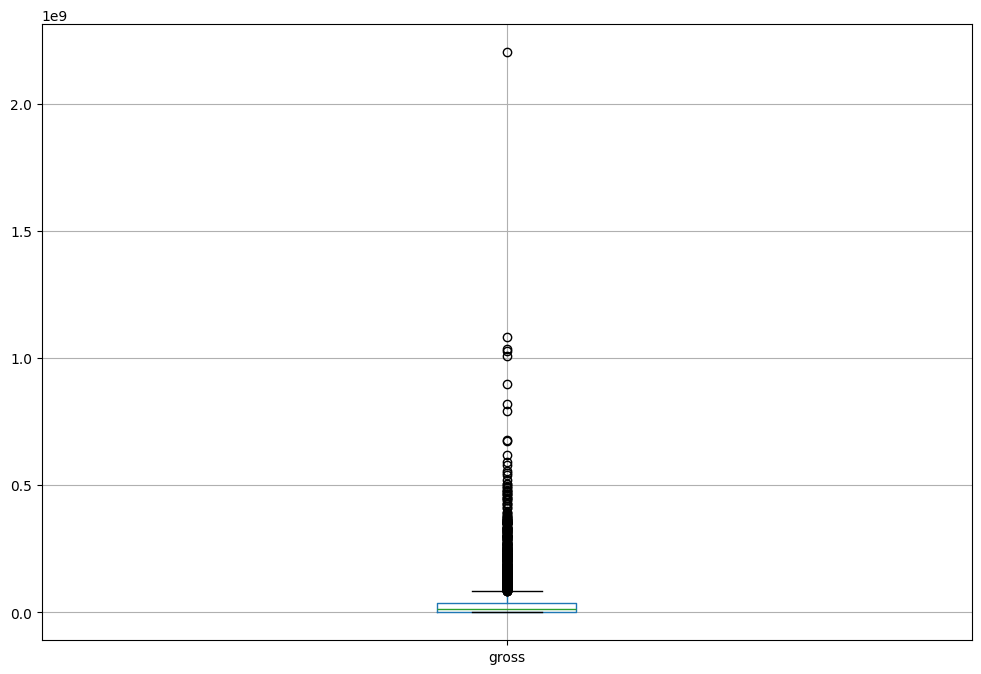

In [123]:
#Checking the outliners
df.boxplot(column=['gross'])

<Axes: >

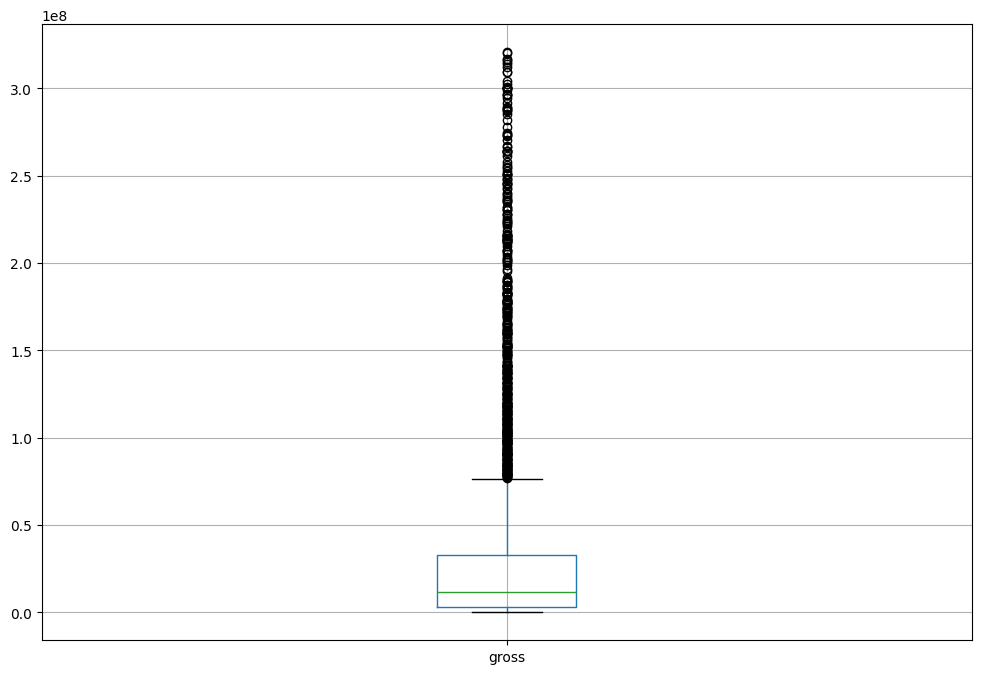

In [124]:
#Remove the outliners
z_scores = stats.zscore(df['gross'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

df.boxplot(column=['gross'])

In [125]:
# renaming runtime column as it was mispelled
df = df.rename(columns={'runtime,,': 'runtime'})

**Data Exploration**

Text(0.5, 1.0, 'Budget vs Gross Earning')

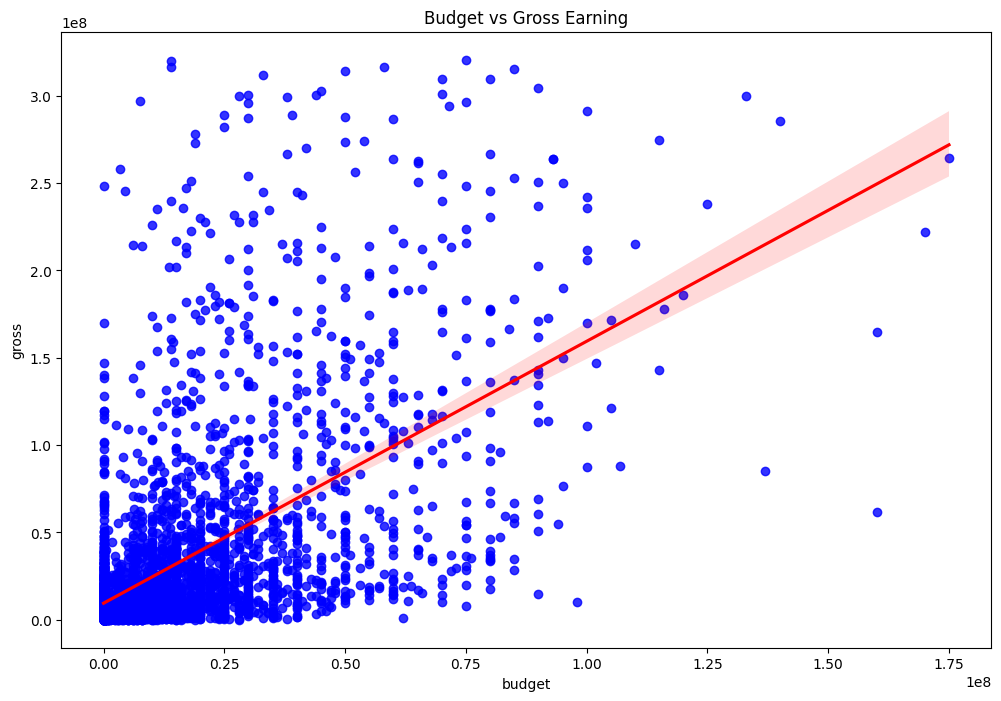

In [126]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'blue' }, line_kws={'color':'red'}).set_title('Budget vs Gross Earning')

Therefore, there is a significant relationship between the budget and gross earnings of a movie.

In [127]:
#Update all the columns to numeric values

df_numerized = df.copy()

for col in df_numerized.columns:
  if(df_numerized[col].dtype == 'object'):
    df_numerized[col] = df_numerized[col].astype('category')
    df_numerized[col] = df_numerized[col].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,released_clean,month
0,3258,6,6,1980,817,8.4,927000,1362,2188,557,35,19000000,46998772.0,1154,70,0,757,6
1,2805,6,1,1980,717,5.8,65000,1195,885,157,36,4500000,58853106.0,358,8,0,659,7
3,131,4,4,1980,717,7.7,221000,687,1097,1229,36,3500000,83453539.0,925,140,0,659,7
4,498,6,4,1980,745,7.3,108000,546,269,206,36,6000000,39846344.0,907,160,0,686,7
5,1068,6,9,1980,1180,6.4,123000,1336,2399,105,36,550000,39754601.0,925,154,0,1100,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,366,6,4,2001,433,6.1,25000,685,2341,1084,35,13000000,16171098.0,530,149,22,396,2
3996,1333,6,4,2001,1459,6.4,18000,1036,339,1414,11,0,1574660.0,542,156,21,1353,9
3997,1676,6,4,2001,265,6.4,18000,786,1240,1468,36,5000000,5480653.0,113,154,21,239,8
3998,2019,6,4,2001,99,6.1,29000,541,2171,885,36,18000000,13578186.0,900,149,21,87,4


In [128]:
#Correlation Matrix

corr_mat = df_numerized.corr()
corr_pair = corr_mat.unstack()

sorted_pairs = corr_pair.sort_values()

# A correlation coefficient of .50 or larger represents a strong or large correlation.
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

In [129]:
high_corr

,,0
gross,budget,0.582746
budget,gross,0.582746
year,correct_year,0.992626
correct_year,year,0.992626
released_clean,released,0.999970
released,released_clean,0.999970
name,name,1.000000
correct_year,correct_year,1.000000
rating,rating,1.000000
genre,genre,1.000000


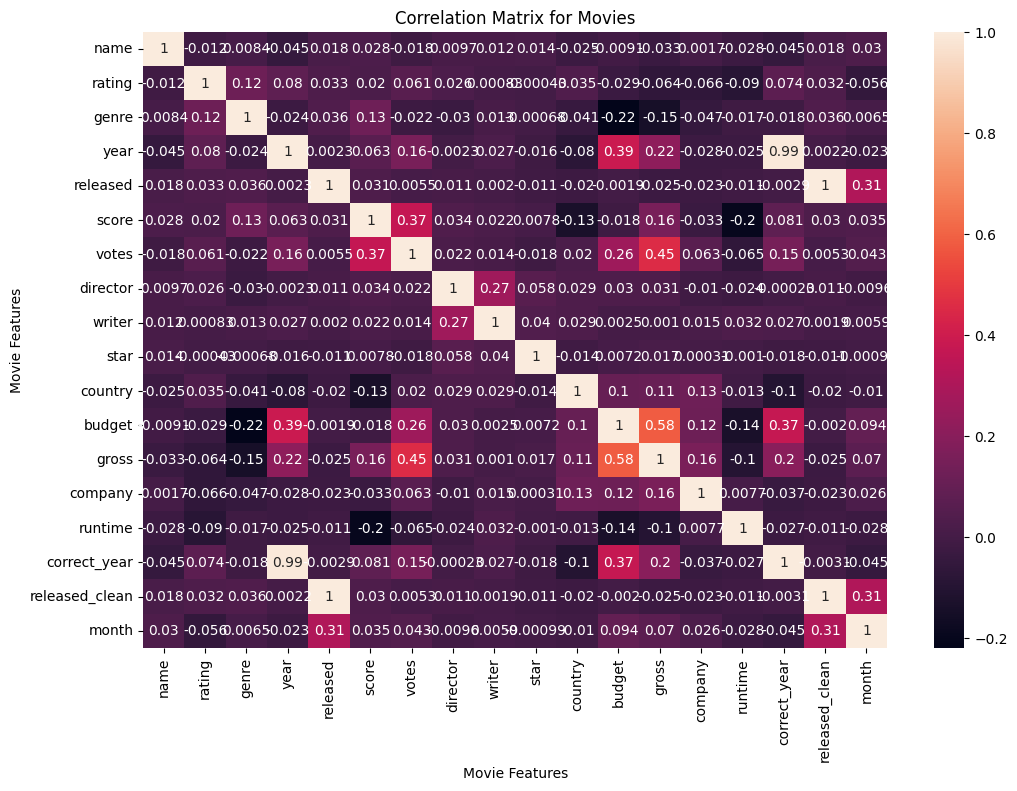

In [130]:
#Vizualising the Correlation Matrix

correlation_matrix = df_numerized.corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Movies')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

Conclusion: The factors contributing to the success of a movie are votes and budget as they have the highest correlation.<br> It was also determined that the Company, Movie name, Genre had no correlation.

Other factors:

1.   What is the best time of year to release a movie?
2.   What is the ideal runtime for a movie?
3.    What genre of movie had the most success on average?
4. What genre of movie has the most success overall?



In [132]:
# 1.
df_numerized.groupby(['month']).mean()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,released_clean
month,,,,,,,,,,,,,,,,,
1,1818.466165,5.462406,4.063910,1992.631579,595.789474,6.337970,49040.030075,826.142857,1249.161654,785.165414,33.439850,1.381977e+07,2.878493e+07,671.285714,75.744361,13.191729,546.447368
2,1852.290850,5.294118,3.931373,1991.323529,485.094771,6.433007,45073.232026,801.617647,1279.473856,718.774510,31.924837,1.216882e+07,2.447662e+07,699.196078,75.114379,11.738562,444.813725
3,1832.844193,5.189802,3.784703,1991.036827,994.249292,6.230028,31469.725212,808.073654,1226.566572,792.776204,32.892351,1.182884e+07,2.381701e+07,692.937677,80.492918,11.237960,926.611898
4,1745.507788,5.255452,3.850467,1991.719626,72.218069,6.151713,28711.370717,759.604361,1234.364486,801.155763,32.358255,1.091975e+07,2.154826e+07,706.015576,85.716511,11.993769,63.520249
5,1712.127820,5.285714,3.537594,1991.011278,1125.458647,6.232707,40660.593985,798.229323,1297.375940,795.067669,33.203008,1.318553e+07,3.046960e+07,711.428571,76.830827,11.338346,1048.432331
6,1863.100806,4.903226,3.108871,1990.629032,862.588710,6.361694,78869.782258,829.677419,1241.435484,746.838710,33.225806,2.430685e+07,6.685906e+07,717.967742,67.471774,10.754032,800.592742
7,1885.172662,4.906475,3.172662,1990.636691,726.877698,6.223381,57275.913669,824.838129,1274.913669,728.841727,32.967626,1.869647e+07,4.885674e+07,771.895683,83.053957,10.798561,668.931655
8,1826.399449,5.179063,3.457300,1991.250689,216.074380,6.124793,38214.851240,789.327824,1260.917355,792.628099,33.275482,1.367727e+07,2.491756e+07,722.132231,84.988981,11.305785,196.969697
9,1865.036545,5.558140,3.960133,1991.305648,1511.774086,6.305648,33199.063123,785.558140,1281.521595,772.039867,31.996678,1.099474e+07,1.819620e+07,656.166113,80.448505,11.411960,1401.166113


range(1, 13)


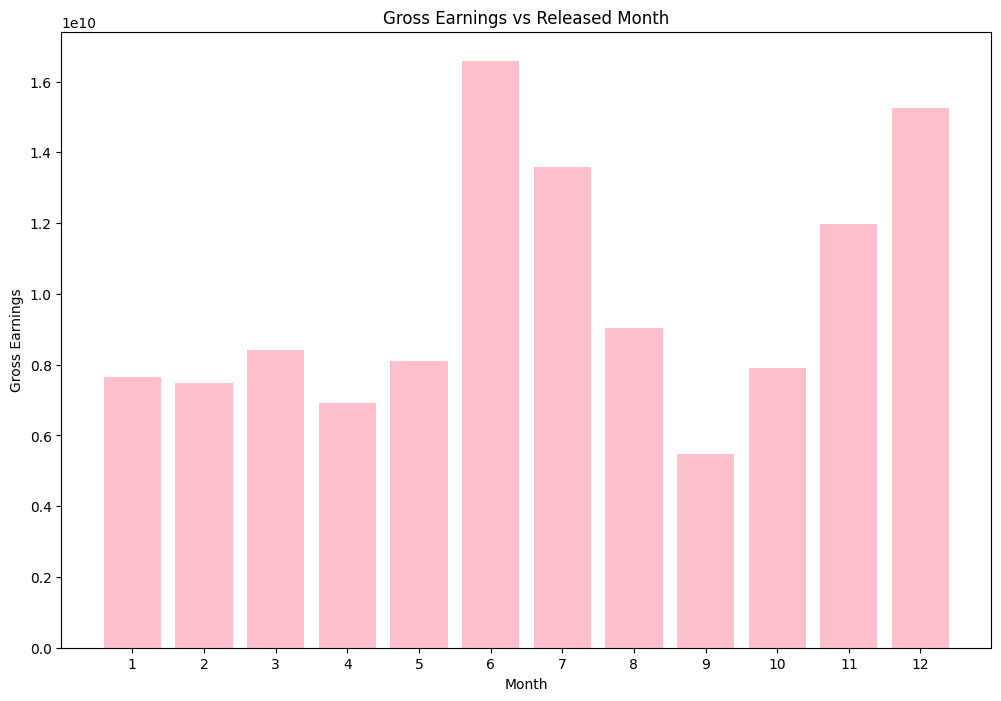

In [133]:
months = range(1,13)
print(months)

plt.bar(months, df.groupby('month').sum()['gross'], color=('pink'))
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Gross Earnings')
plt.title('Gross Earnings vs Released Month')
plt.show()

1. Thus the best time to release a movie is during June(based on overall earning)

In [136]:
#2.
earnings_avg = df_numerized.groupby(['runtime'])['gross'].mean()
earnings_avg.sort_values()


,gross
runtime,
23,1.963200e+04
30,2.617700e+04
19,2.981500e+04
38,3.533600e+04
142,1.081280e+05
...,...
79,1.340953e+08
65,1.486187e+08
98,1.574229e+08


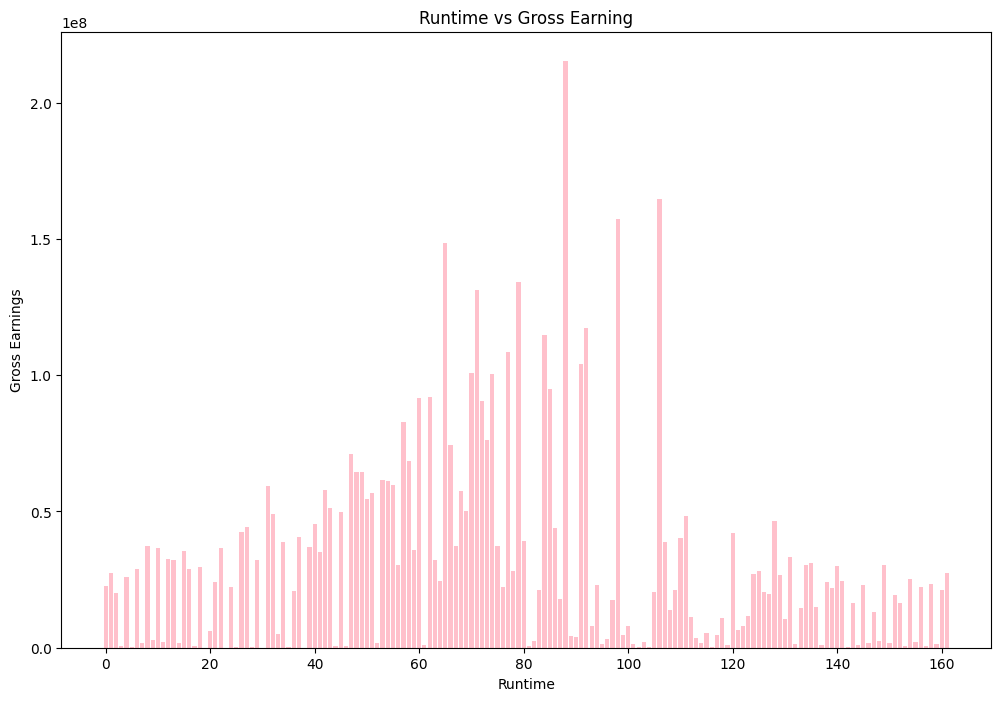

In [137]:
plt.bar(earnings_avg.index, earnings_avg.values, color=('pink'))
plt.xlabel('Runtime')
plt.ylabel('Gross Earnings')
plt.title('Runtime vs Gross Earning')
plt.show()

2. Therefore, ideal runtime should be from 85 to 110 minutes.

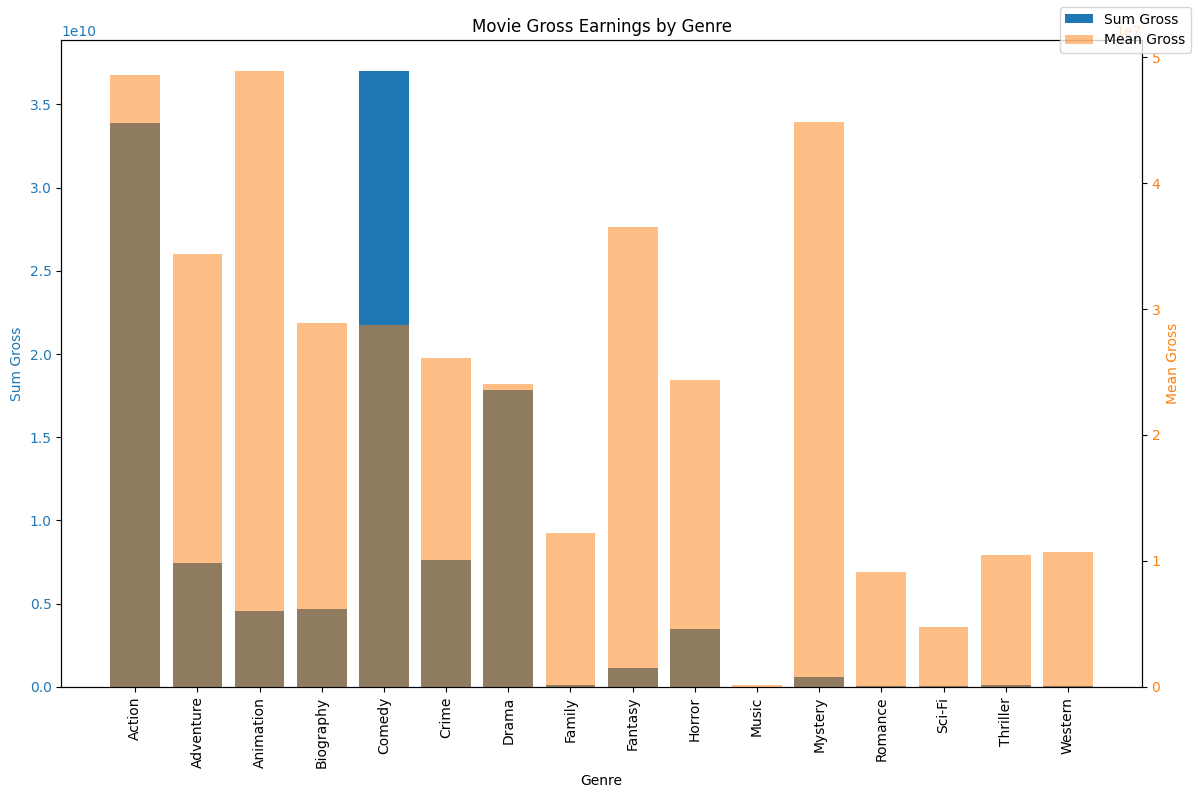

In [138]:
#3.
# Group by genre and calculate sum and mean
grouped_df = df.groupby(['genre'])['gross'].agg(['sum', 'mean'])
genres = grouped_df.index  # Index directly contains genre names
sum_gross = grouped_df['sum']  # Sum gross values
mean_gross = grouped_df['mean']  # Mean gross values

# Set up the bar chart
fig, ax1 = plt.subplots()

# Plot the bar chart for sum gross
color = 'tab:blue'
ax1.bar(genres, sum_gross, color=color, label='Sum Gross')

# Add labels and title
ax1.set_xlabel('Genre')
ax1.set_ylabel('Sum Gross', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Movie Gross Earnings by Genre')
plt.xticks(rotation=90)  # Rotate genre names for better visibility

# Create a second y-axis for mean gross
ax2 = ax1.twinx()

# Plot the bar chart for mean gross
color = 'tab:orange'
ax2.bar(genres, mean_gross, color=color, alpha=0.5, label='Mean Gross')

# Add labels
ax2.set_ylabel('Mean Gross', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a legend
fig.legend(loc='upper right')

# Adjust layout
fig.tight_layout()

plt.show()

Therefore, The Action genre,  had the highest level of success across all movies, whereas the Comedy genre had the highest average success rate.

**Conclusion:**


1. Genres with High Sum Gross:
* Comedy, Action, and Adventure have the highest sum gross, indicating that these genres generate the largest total revenue overall. <br>

2. Genres with High Mean Gross:
* Mystery has a relatively high mean gross despite not having the highest sum gross. This indicates that, on average, movies in this genre tend to perform better financially per movie compared to other genres.
* Animation and Adventure also exhibit high mean gross values, implying their consistency in earning good revenues.

3. Genres with Low Sum Gross:
* Genres like Horror and Music have lower sum gross, indicating a smaller total contribution to the market revenue.

4. Genres with Low Mean Gross:
* Sci-Fi and Romance have lower mean gross, showing that these movies tend to perform poorly on average.



**Key Insights:**

1. High Total Revenue but Moderate Average Performance:
* Genres like Comedy generate large total revenue but may have some underperforming movies, leading to moderate mean gross values.

2. High Average Revenue but Lower Total Revenue:
* Genres like Mystery seem to have fewer movies but higher average success, highlighting their niche but high-value appeal.

My analysis revealed that: <br>
This graph suggests that genres like Action, Adventure, and Comedy are good choices for consistent market success, while Mystery and Animation can be high-reward niches.